<a href="https://colab.research.google.com/github/edogriba/NAML-2024/blob/main/LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 02

## Randomized SVD

In [10]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = 'TarantulaNebula.jpg'

A = imread(image_path)

In [11]:
def randomized_SVD(A, k):
  P = np.random.randn(A.shape[1], k)
  Z = A @ P
  Q, _ = np.linalg.qr(Z)
  Y = Q.T @ A
  Uy, s, VT = np.linalg.svd(Y, full_matrices=False)
  U = Q @ Uy
  return U, s, VT

  # np.random.randn()
  # np.linalg.qr
  # np.linalg.svd

In [12]:
X = np.mean(A, axis=2)

Now let's define k = 100 and compute the randomized SVD of the picture used above

In [13]:
k = 100
U, s, VT = np.linalg.svd(X)
Ur, sr, VTr = randomized_SVD(X, k)

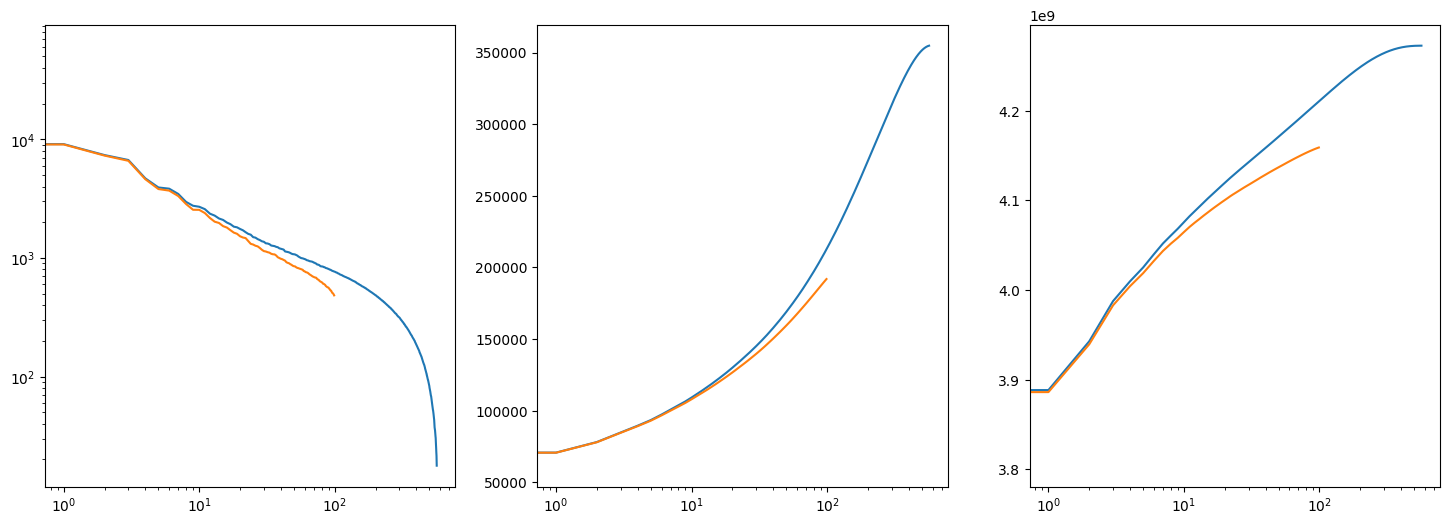

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].loglog(s)
axs[1].semilogx(np.cumsum(s))
axs[2].semilogx(np.cumsum(s**2))

axs[0].loglog(sr)
axs[1].semilogx(np.cumsum(sr))
axs[2].semilogx(np.cumsum(sr**2))

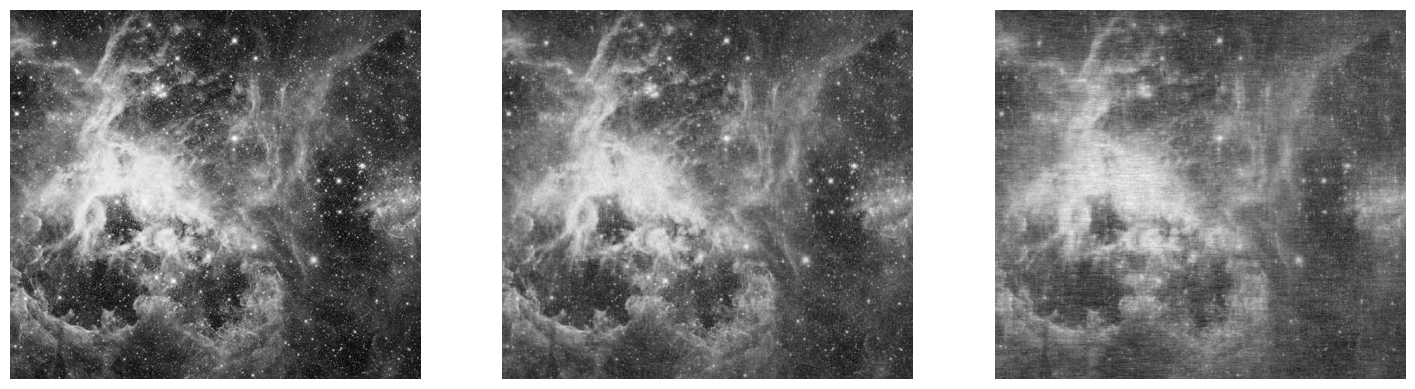

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(X, cmap="gray")
axs[0].set_axis_off()

axs[1].imshow(U[:, :k]@np.diag(s[:k])@VT[:k, :], cmap="gray")
axs[1].set_axis_off()


axs[2].imshow(Ur@np.diag(sr)@VTr, cmap="gray")
axs[2].set_axis_off()


## Serum proteomic pattern diagnostics



Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 4000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

### Data exploration


Let's store in efficient data structures the data and explore it

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = 'ovariancancer_obs.csv'
ovariancancer_grp_path = 'ovariancancer_grp.csv'


A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
with open(ovariancancer_grp_path, "r") as fp:
  grp = np.array(fp.read().split("\n"))

grp = grp[grp != [''] ]


In [17]:
print(f"The number of patients is {A.shape[1]}")
print(f"The number of features is {A.shape[0]}")

The number of patients is 216
The number of features is 4000


In [18]:
print("The number of patients with cancer is ", np.sum(grp == 'Cancer'))
print("The number of patients without cancer is ", np.sum(grp == 'Normal'))

The number of patients with cancer is  121
The number of patients without cancer is  95


Let's choose two random proteins (from 1 to 4000) and make a scatterplot of the corresponding vaues plotting with different colors the data.

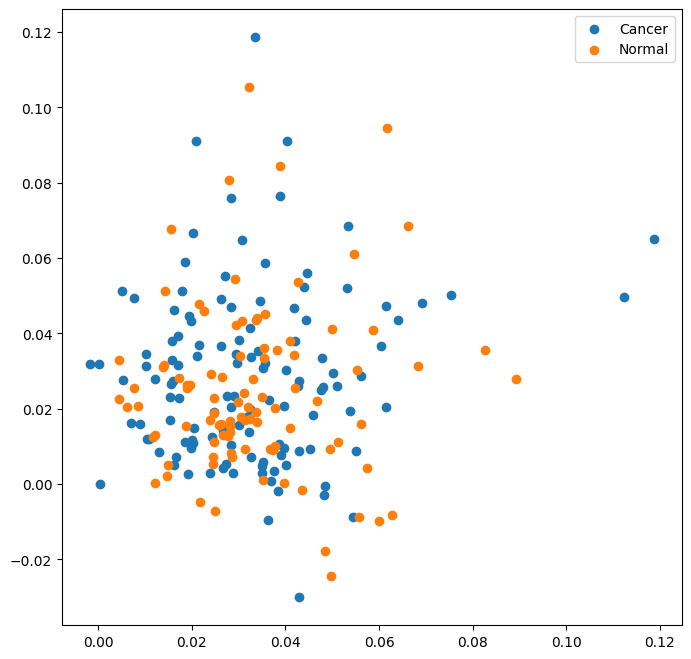

In [19]:
protein_x = 10
protein_y = 999

plt.scatter(A[protein_x, grp == 'Cancer'], A[protein_y, grp == 'Cancer'])
plt.scatter(A[protein_x, grp == 'Normal'], A[protein_y, grp == 'Normal'])
plt.legend(['Cancer', 'Normal'])

From here we cannot distinguish patients with cancer from patients without it

 Let's repeat the process with 3 proteins

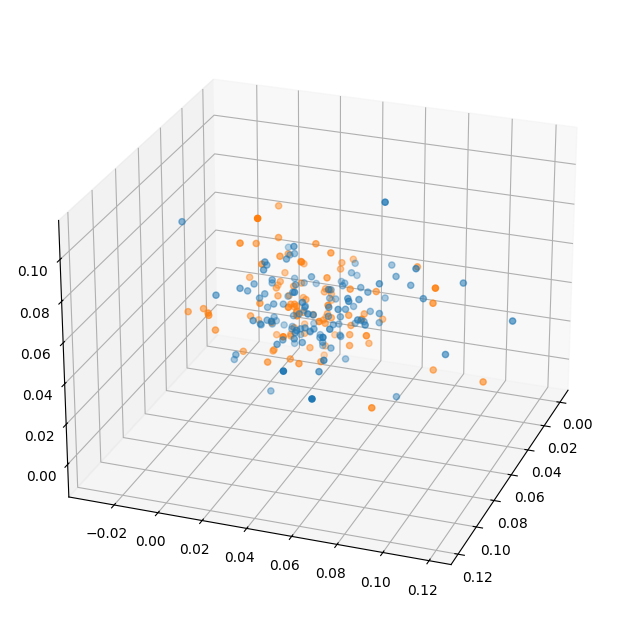

In [20]:
protein_z = 2000

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
for cat in ['Cancer', 'Normal']:
  ax.scatter(A[protein_x, grp == cat], A[protein_y, grp == cat], A[protein_z, grp == cat])
ax.view_init(25, 20)


For 3D visualizations plotly is much better than matplotlib

In [21]:
import plotly.express as px

px.scatter_3d(x = A[protein_x, :], y = A[protein_y, :], z = A[protein_z, :], color = grp)

### Principal Component Analysis

Perform PCA on the dataset

In [22]:
A_mean = np.mean(A, axis=1)
A_mean.shape

(4000,)

In [23]:
A_bar = A - A_mean[:, None]
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)


Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

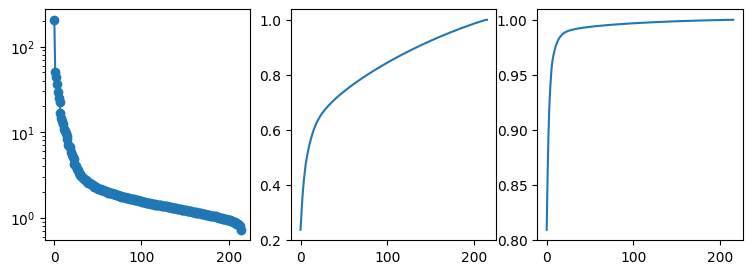

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

axs[0].semilogy(s[:-1], 'o-')
axs[1].plot(np.cumsum(s)/np.sum(s))
axs[2].plot(np.cumsum(s**2)/sum(s**2))

Make a scatterplot of the first two principal components of the patients.

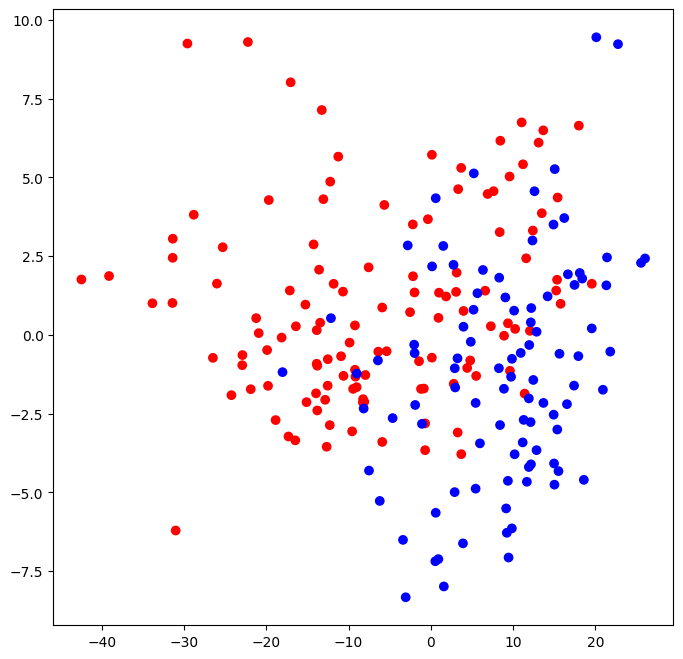

In [25]:
Phi = U.T @ A_bar
COLOR_MAP = {
  'Cancer': 'red',
  'Normal': 'blue'
}

plt.scatter(Phi[0, :], Phi[1, :], c=[COLOR_MAP[e] for e in grp])

In [26]:
px.scatter_3d(x=Phi[0, :], y=Phi[1, :], z=Phi[2, :], color=grp)

## Handwriting recognition


### Data import and visualization


Import the MNISt train dataset ( present by default in every sample_data folder on Colab)

In [27]:
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt('sample_data/mnist_train_small.csv', delimiter=',')
data.shape


(20000, 785)

Store the data in a matrix and label the vectors

In [28]:
labels_full = data[:, 0]
A_full = data[:, 1:].transpose()
labels_full.shape, A_full.shape

((20000,), (784, 20000))

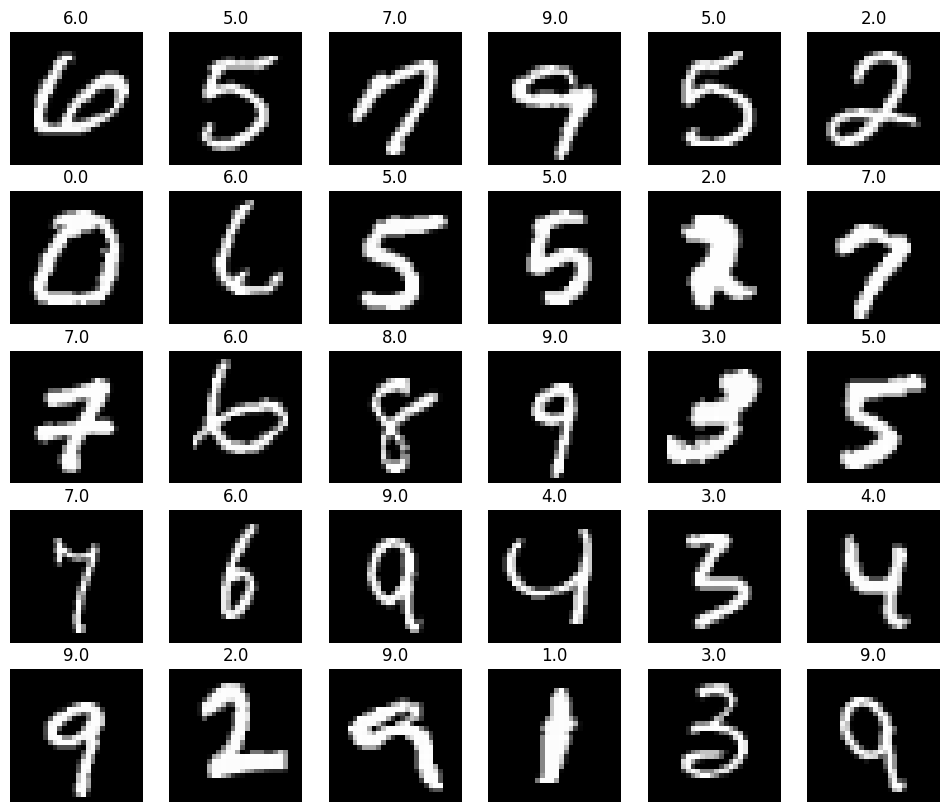

In [29]:
fig, axs = plt.subplots(5, 6, figsize= (12, 10))
axs = axs.reshape((-1))
for i in range(len(axs)):
  picture = A_full[:, i].reshape(28, 28)
  axs[i].imshow(picture, cmap="gray")
  axs[i].set_title(labels_full[i])
  axs[i].set_axis_off()

In [30]:
mask_9 = labels_full == 9
mask_4 = labels_full == 4

A9 = A_full[:, mask_9]
labels9 = labels_full[mask_9]

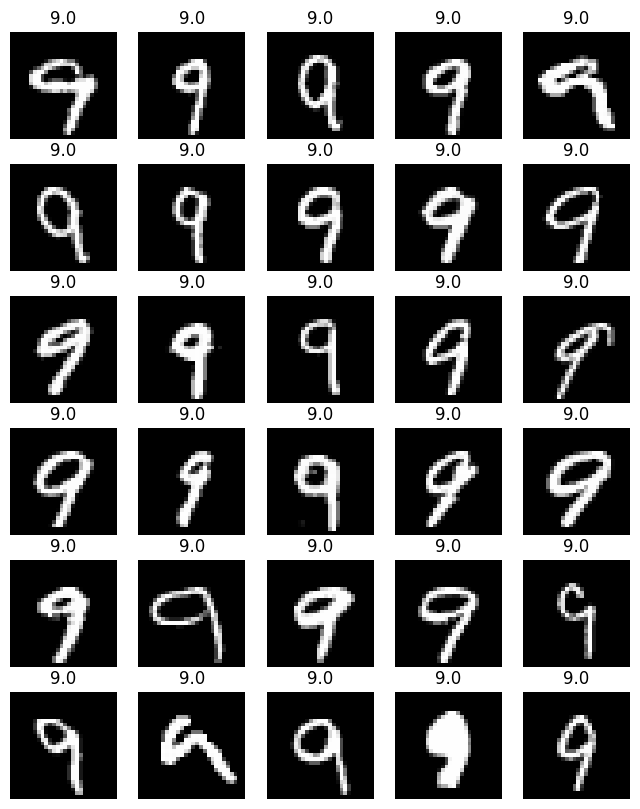

In [31]:
fig, axs = plt.subplots(6, 5, figsize=(8, 10))
axs = axs.reshape((-1))
for i in range(len(axs)):
  axs[i].imshow(A9[:, i].reshape(28, 28), cmap='gray')
  axs[i].set_title(labels9[i])
  axs[i].set_axis_off()


In [32]:
mask_0 = labels_full == 0

A = A_full[:, mask_0 | mask_9]
labels = labels_full[mask_0 | mask_9]

Take the mean

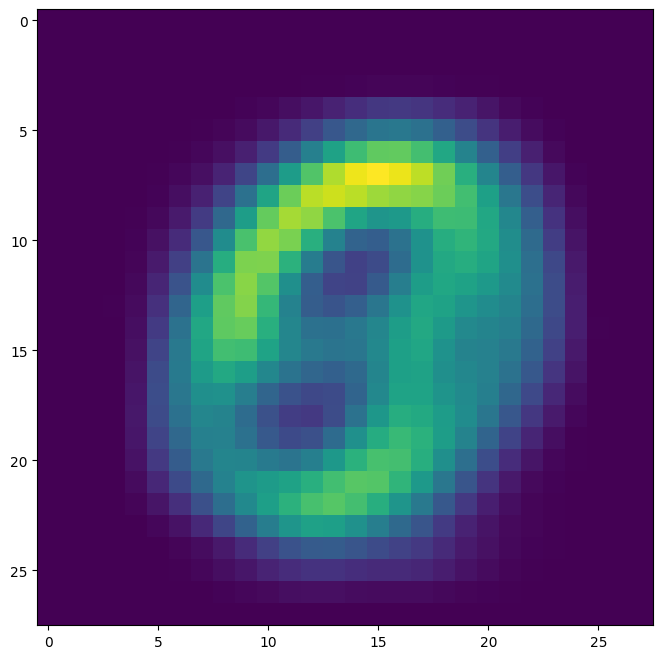

In [33]:
A_mean = np.mean(A, axis=1)
A_bar = A-A_mean[:, None]
plt.imshow(A_mean.reshape((28, 28)))

Compute the PCA on the average data

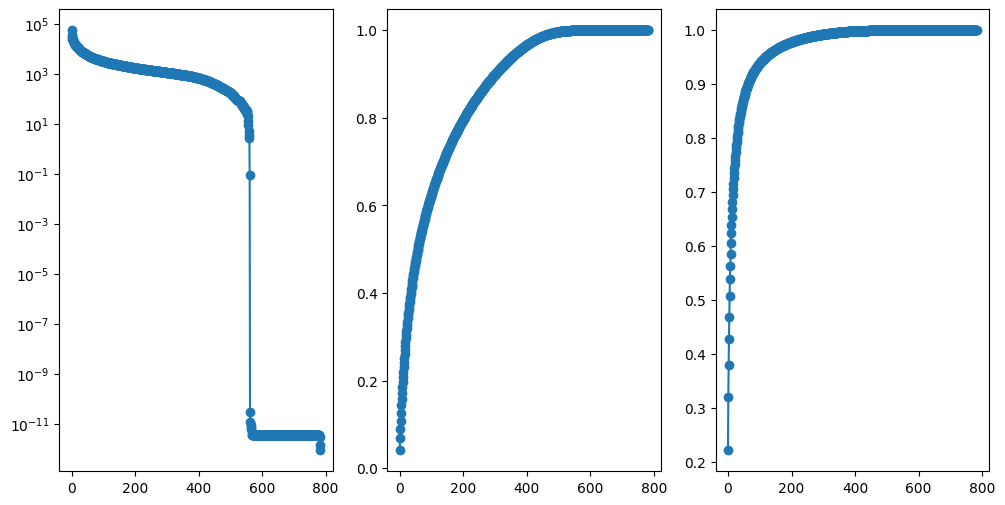

In [34]:
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].semilogy(s, 'o-')
axs[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')

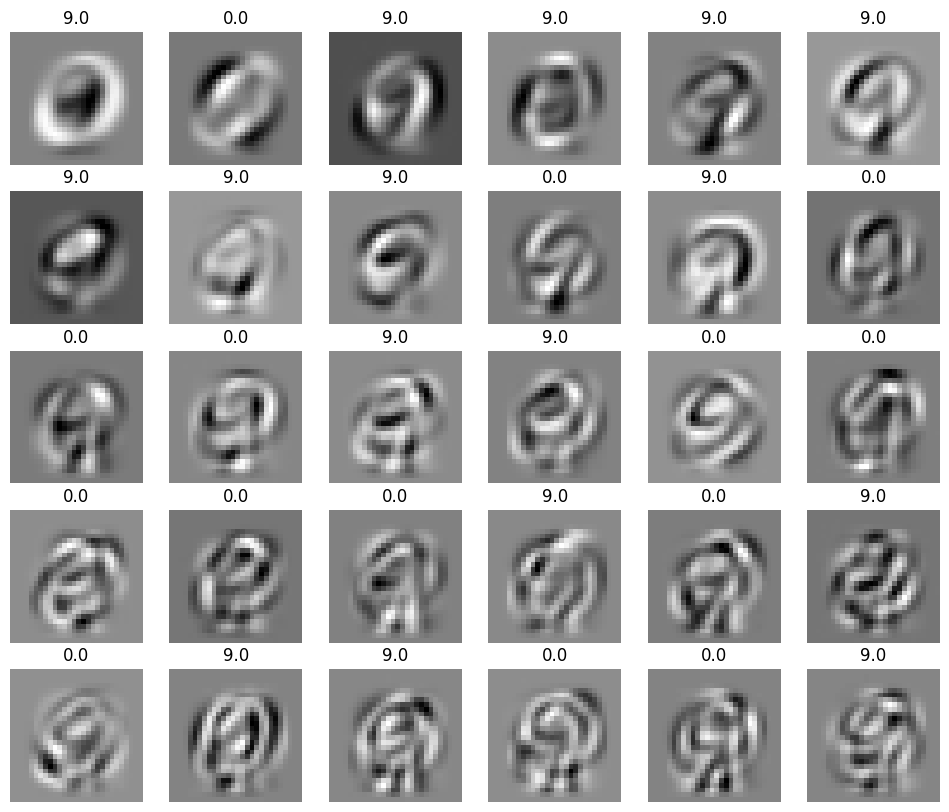

In [35]:
fig, axs = plt.subplots(5, 6, figsize=(12, 10))
axs = axs.reshape((-1))
for i in range(len(axs)):
  picture = U [:, i].reshape((28, 28))
  axs[i].imshow(picture, cmap='gray')
  axs[i].set_title(f"{labels[i]}")
  axs[i].axis('off')

Compute the first two principal components corresponding to the first image


In [36]:
# Method 1 (quicker)
first_image = A_bar[:, 0]
pc1 = np.inner(first_image, U[:, 0])
pc2 = np.inner(first_image, U[:, 1])
print(f"pc1 is {pc1}")
print(f"pc2 is {pc2}")

pc1 is -529.0964148086608
pc2 is -580.8608501624369


Define a matrix of all the principal components of all the images

In [37]:
# Method 2 (more complete)
Phi = U.T @ A_bar
print(f"first principal component of 1st image {Phi[0, 0]}")
print(f"second principal component of 1st image {Phi[1, 0]}")

first principal component of 1st image -529.0964148086607
second principal component of 1st image -580.8608501624367


Let's create a scatterplot of the first 2 principal components of all the training images, grouped by label, considering only the first 500.


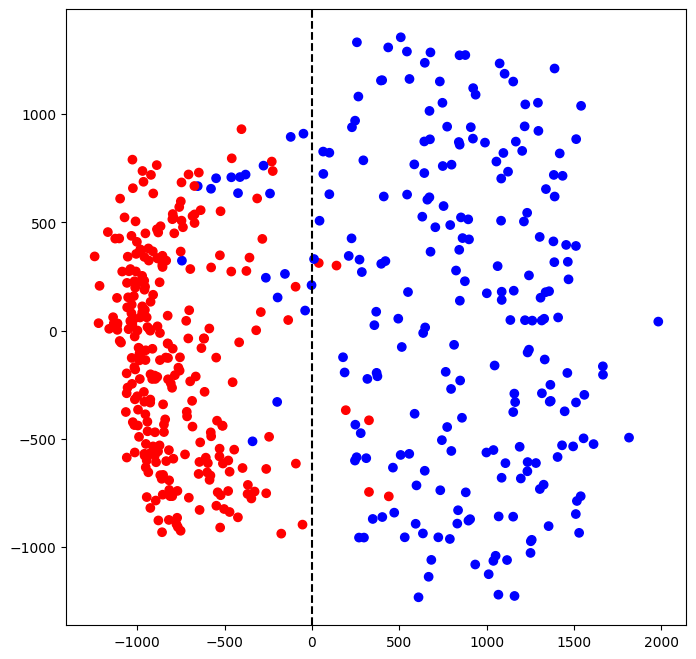

In [38]:
threshold = 0.0
n_pics = 500
COLORMAP = {9: 'red', 0: 'blue'}
plt.scatter(Phi[0, :n_pics], Phi[1, :n_pics], c = [COLORMAP[e] for e in labels[:n_pics]])
plt.axvline(threshold, color='black', linestyle='--')

In [39]:
data_test_full = np.genfromtxt("sample_data/mnist_test.csv", delimiter=',')
labels_test_full = data_test_full[:, 0]
A_test_full = data_test_full[:, 1:].transpose()
# We have to construct the mask
mask = (labels_test_full == 9) | (labels_test_full == 0)
labels_test = labels_test_full[mask]
A_test = A_test_full[:, mask]

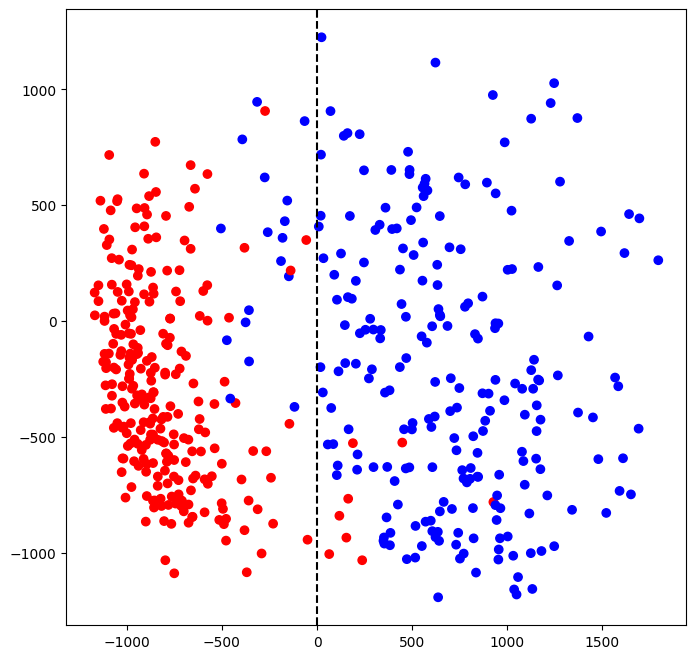

In [40]:
A_bar_test = A_test- A_mean[:, None] # the mean is the same
Phi_test = U.T @ A_bar_test

threshold = 0.0
n_pics = 500
COLORMAP = {9: 'red', 0: 'blue'}
plt.scatter(Phi_test[0, :n_pics], Phi_test[1, :n_pics], c = [COLORMAP[e] for e in labels_test[:n_pics]])
plt.axvline(threshold, color='black', linestyle='--')


In [41]:
mask_predicted = Phi_test[0, :] < threshold
labels_predicted = mask_predicted * 9 + (~mask_predicted) * 0

true_0 = np.sum((labels_test == 0) & (labels_predicted == 0))

true_9 = np.sum((labels_test == 9) & (labels_predicted == 9))

false_9 = np.sum((labels_test == 0) & (labels_predicted == 9))

false_0 = np.sum((labels_test == 9) & (labels_predicted == 0))

accuracy = (true_0 + true_9) / labels_test.size

print(true_0)
print(true_9)
print(false_0)
print(false_9)


927
979
30
53


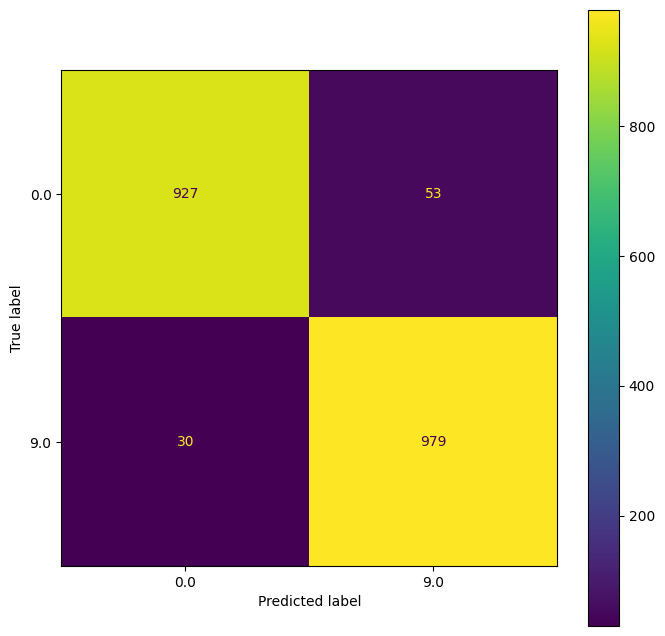

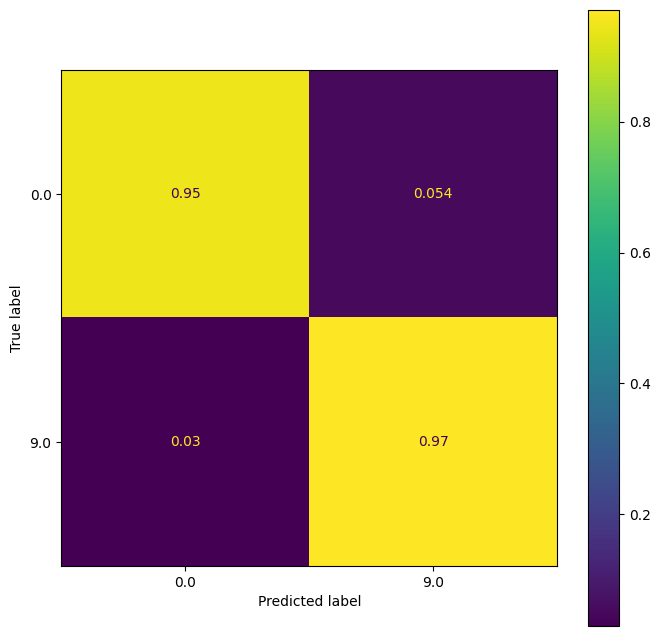

In [42]:
from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(labels_test, labels_predicted)
metrics.ConfusionMatrixDisplay.from_predictions(labels_test, labels_predicted, normalize ='true')